# Outliers and Impact on Machine Learning
Outlier is a completely different data point from the other obeservations. <br>
Outliers are also important as they will help us representing some suspicious activity. <br>
Based on the given problem and data outliers can/cannot be removed. <br>
As some of them have a lot impact on the problem or given situation. <br>


### Machine Learning Models Sensitive to Outliers :
 1. Navie Bayes Classifier ----------------- Not Sensitive
 2. SVM ------------------------------------ Not Sensitive
 3. Linear Regression ---------------------- Sensitive
 4. Logistic Regression -------------------- Sensitive
 5. Decision Tree Regressor/Classifier ----- Not Sensitive
 6. Random Forest,XGBoost,Gradient Boost --- Not Sensitive
 7. KNN ------------------------------------ Not Sensitive
 8. K-means -------------------------------- Sensitive
 9. Hierarichal Clustering ----------------- Sensitive
10. Principle Component Analysis ----------- Sensitive
11. Neural Networks ------------------------ Sensitive

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Density'>

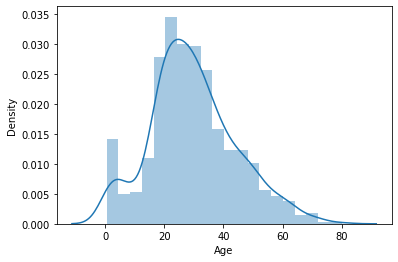

In [6]:
sns.distplot(df['Age'].dropna())

<AxesSubplot:xlabel='Age', ylabel='Density'>

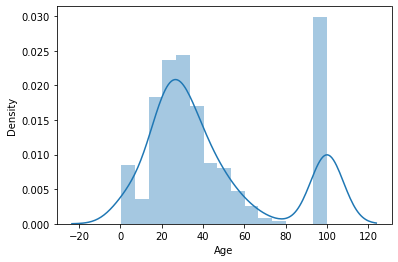

In [7]:
sns.distplot(df.Age.fillna(100))

### Guassian Distribution

Text(0, 0.5, 'Number of Passangers')

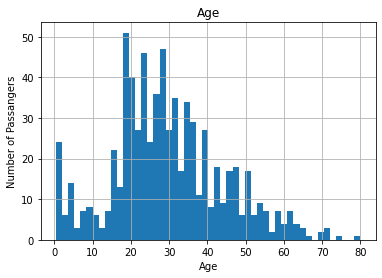

In [11]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Number of Passangers')

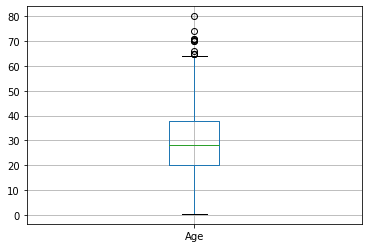

In [12]:
figure = df.boxplot(column='Age')

In [14]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Assuming Age follows a Gaussian Distribution we'll create boundaries which differentiates the outliers.

In [18]:
upper_boundary = df.Age.mean() + 3*(df.Age.std())
lower_boundary = df.Age.mean() - 3*(df.Age.std())

### Skewed Feature

Text(0, 0.5, 'Number of Passengers')

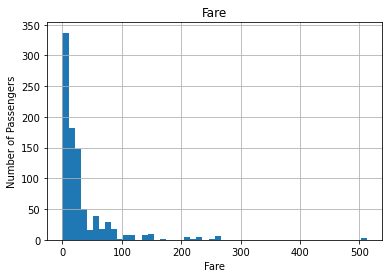

In [33]:
figure = df.Fare.hist(bins=50)
figure.set_title("Fare")
figure.set_xlabel("Fare")
figure.set_ylabel("Number of Passengers")

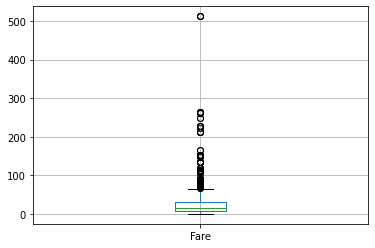

In [34]:
figure = df.boxplot(column='Fare')

In [35]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [36]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [39]:
lower_bridge = df.Fare.quantile(0.25) - IQR*3
upper_bridge = df.Fare.quantile(0.75) + IQR*3
lower_bridge

-61.358399999999996

In [40]:
upper_bridge

100.2688

In [43]:
data = df.copy()

In [44]:
data.loc[data['Age']>73,'Age'] = 73

In [47]:
data.loc[data['Fare']>100,'Fare'] = 100

In [48]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.687913,0.523008,0.381594,27.027169
std,257.353842,0.486592,0.836071,14.490589,1.102743,0.806057,27.296632
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,73.000000,8.000000,6.000000,100.000000


In [51]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)


In [66]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred1[:,1]))

0.6865671641791045
0.7449943219173989


In [67]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_pred1 = classifier.predict_proba(x_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred1[:,1]))

0.6380597014925373
0.719114219114219
